<a href="https://colab.research.google.com/github/SulemanShahani/Fashion-MNIST-Classification-with-Keras/blob/main/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.layers[1].name
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
model.layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 100)               40100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))


Epoch 1/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3637 - accuracy: 0.8661 - val_loss: 0.3464 - val_accuracy: 0.8740
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3265 - accuracy: 0.8795 - val_loss: 0.3183 - val_accuracy: 0.8832
Epoch 3/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3012 - accuracy: 0.8872 - val_loss: 0.3275 - val_accuracy: 0.8810
Epoch 4/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2829 - accuracy: 0.8936 - val_loss: 0.3023 - val_accuracy: 0.8894
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2698 - accuracy: 0.8979 - val_loss: 0.3348 - val_accuracy: 0.8744
Epoch 6/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2549 - accuracy: 0.9035 - val_loss: 0.3054 - val_accuracy: 0.8908
Epoch 7/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2427 - accuracy: 0.9102 - val_loss: 0.3069 - val_ac

Good Generalization: The validation accuracy and training accuracy are close to each other, indicating that the model generalizes well to unseen data and is not significantly overfitting.
Plateauing Performance: Both the training and validation losses and accuracies start to plateau after several epochs. This plateau suggests that the model has learned most of what it can from the data, and further training is yielding diminishing returns.


Loss and Accuracy Trends:

Improvement: There is a clear improvement in both training and validation metrics over the epochs.
Stability: The metrics remain relatively stable towards the end, with minor fluctuations, which is common as the model approaches its optimal performance.

In [25]:
history.history

{'loss': [0.3637320101261139,
  0.3265440762042999,
  0.30124223232269287,
  0.2829083502292633,
  0.2697506248950958,
  0.2549397051334381,
  0.24268479645252228,
  0.23655876517295837,
  0.22487208247184753,
  0.21423572301864624,
  0.20783968269824982,
  0.20029808580875397,
  0.1959894299507141,
  0.18909825384616852,
  0.1803971230983734,
  0.17614492774009705,
  0.17227526009082794,
  0.16348552703857422,
  0.16044534742832184,
  0.15759770572185516],
 'accuracy': [0.8660908937454224,
  0.8795454502105713,
  0.88718181848526,
  0.8935636281967163,
  0.8979091048240662,
  0.9035090804100037,
  0.9102181792259216,
  0.9087272882461548,
  0.9147818088531494,
  0.9174727201461792,
  0.9211999773979187,
  0.9229636192321777,
  0.9250909090042114,
  0.9276909232139587,
  0.930436372756958,
  0.9320363402366638,
  0.9339091181755066,
  0.9370909333229065,
  0.9386363625526428,
  0.9399818181991577],
 'val_loss': [0.34636688232421875,
  0.31825727224349976,
  0.32752445340156555,
  0.302

In [26]:

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 68.3832 - accuracy: 0.8769


[68.38324737548828, 0.8769000172615051]

In [27]:

X_new = X_test[:3]
# Predict logits with the original model
logits = model.predict(X_new)

# Round the logits (optional, for inspection purposes)
rounded_logits = logits.round(2)
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 34ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [29]:
# Predict probabilities using the new model
probabilities = probability_model.predict(X_new)

# Round the probabilities (optional, for inspection purposes)
rounded_probabilities = probabilities.round(2)

print("Logits:\n", rounded_logits)
print("Probabilities:\n", rounded_probabilities)

1/1 [==============================] - 0s 174ms/step
Logits:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Probabilities:
 [[0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.23]
 [0.09 0.09 0.23 0.09 0.09 0.09 0.09 0.09 0.09 0.09]
 [0.09 0.23 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09]]


In [30]:
# Get the class with the highest probability for the first sample
probabilities[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931],
      dtype=float32)

In [31]:
# Get the class with the highest probability for the first sample
predicted_class = np.argmax(probabilities[0])

In [32]:
# Get the true class for the first sample
true_class = y_test[0]

# Compare predicted class with true class
comparison_result = predicted_class == true_class

print("Predicted probabilities for the first sample:\n", probabilities[0])
print("Predicted class for the first sample:", predicted_class)
print("True class for the first sample:", true_class)
print("Prediction is correct:", comparison_result)

Predicted probabilities for the first sample:
 [0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533674 0.08533674 0.23196931]
Predicted class for the first sample: 9
True class for the first sample: 9
Prediction is correct: True


313/313 [==============================] - 2s 6ms/step


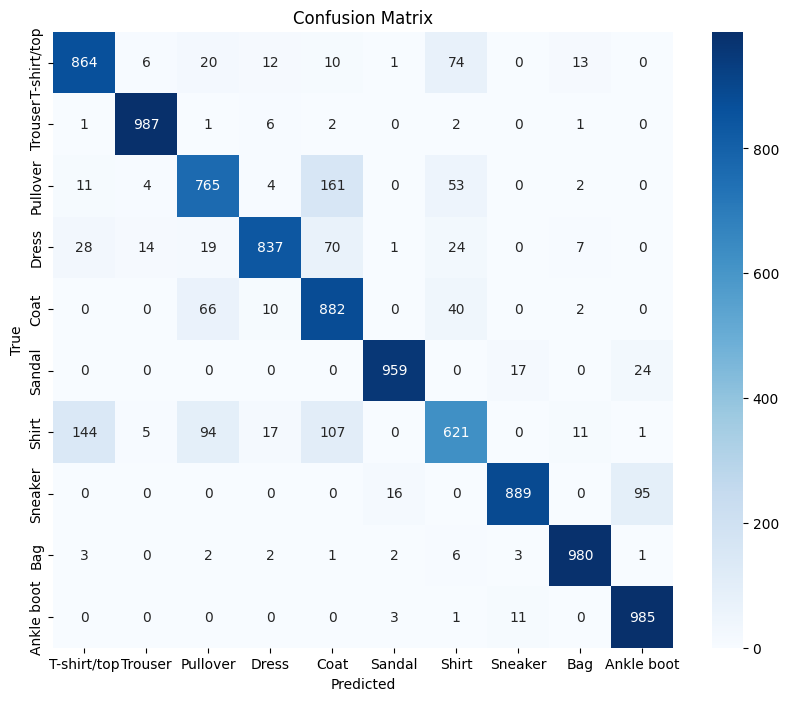

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions for the test set
y_pred = model.predict(X_test).argmax(axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.97      0.99      0.98      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.94      0.84      0.89      1000
        Coat       0.72      0.88      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.76      0.62      0.68      1000
     Sneaker       0.97      0.89      0.93      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.89      0.98      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



313/313 [==============================] - 2s 5ms/step


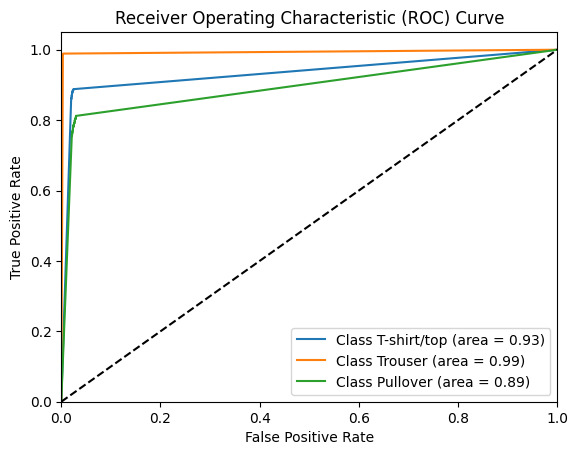

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=range(10))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for the first 3 classes as an example
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


313/313 [==============================] - 1s 4ms/step


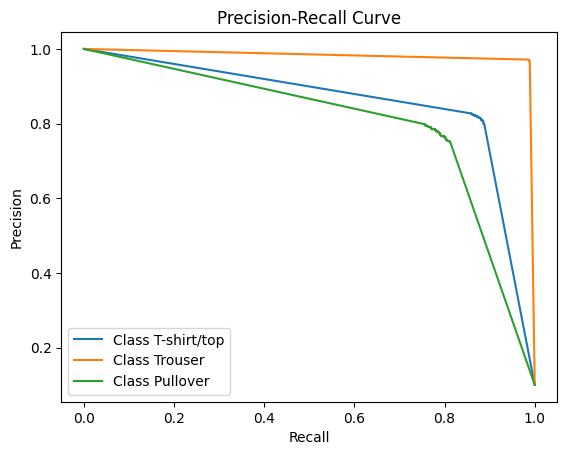

In [38]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], model.predict(X_test)[:, i])

# Plot Precision-Recall curves for the first 3 classes as an example
plt.figure()
for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {class_names[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


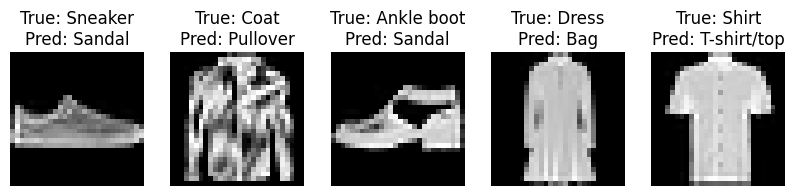

In [39]:
# Get the indices of misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]

# Plot the first 5 misclassified examples
plt.figure(figsize=(10, 8))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}')
    plt.axis('off')
plt.show()


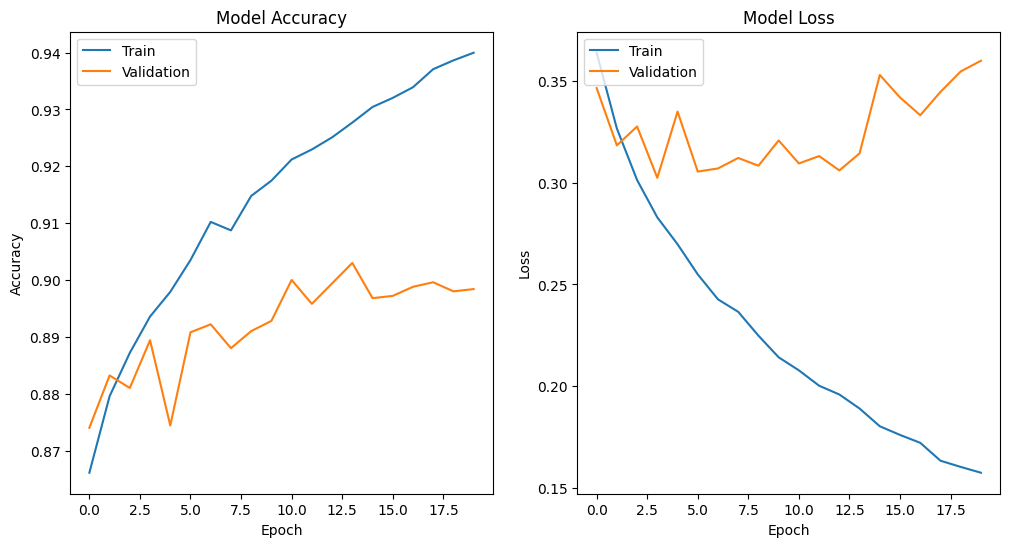

In [40]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
